**Objective**

Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business. The idea is to get you comfortable working in Python.

You are expected to do the following :

1. Produce a customer profile (characteristics of a customer) of the different products
2. Perform univariate and multivariate analyses
3. Generate a set of insights and recommendations that will help the company in targeting new customers.
 

**Data Dictionary**

The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

1. Product - The model no. of the treadmill
2. Age -  Age of the customer in no of years
3. Gender - Gender of the customer
4. Education - Education of the customer in no. of years
5. Marital Status - Marital status of the customer
6. Usage - Avg. # times the customer wants to use the treadmill every week
7. Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8. Income - Income of the customer
9. Miles- Miles that a customer expects to run

Source: 
https://olympus.mygreatlearning.com/courses/73879/assignments/283863?module_item_id=2302671

#**Importing libraries needed to read, manipulate, and visualize data**

In [1]:
# Importing Libraries needed to help read and manipulate Cardio Good Fitness data
import numpy as np
import pandas as pd

# Importing Libraries needed to help with  Cardio Good Fitness data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Loading dataset**

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CardioGoodFitness (2).csv')
df = data # Changing data to df as shorthand

Understanding the structure of the data

* Overview of the dataset shape, datatypes, statistical summary and check for missing values

In [3]:
df.head() # displaying the first rows of the dataset

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.tail() # displaying the last rows of the dataset

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


* Product column contains the model no. of the treadmill
* Age column contains the Age of the customer in no. of years
* Gender column contains Gender of the customer
* Education column contains Education of the customer in no. of years
* MaritalStatus column contains Marital status of the customer
* Usage column contains Avg. # times the customer wants to use the treadmill every week
* Fitness column contains Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income column contains Income of the customer
* Miles column contains Miles that a customer expects to run


In [5]:
df.shape # Checking the shape of the dataset

(180, 9)

* The dataset has 180 rows and 9 columns

In [6]:
df.info() # Checking the data types of the columns in bold text above

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


* All the columns have 180 observations
* There are six (6) numerical columns in the data and three (3) object type columns.


In [7]:
df.isnull().sum() # Checking missing values across each columns

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

* There are no missing value within all columns

In [24]:
df.duplicated().sum() # Checking for duplicate entries in the data

0

* There are no duplicated entries in the data

In [8]:
df.describe().T # Getting statistical summary for the dataset

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


* Age: 75% are ages 18-33 years old
* Education: 16 years of education is the average education for the customers in years 
* Usage: treadmill users have a demand to use the treadmills 3.5 per week.
* Fitness: the average customer is reasonably fit with a self rating averaging 3.3
* Income: median income is $50,596.50
* Miles: customers are running an average of 103 miles per week. This calculates to around 30 miles per use of the treadmil. **(Miles per usage = Miles mean / Usage mean) 29.86 = 103/3.45**


In [25]:
df['Product'].nunique() # Checking the total number of unique Products 

3

* There are three (3) different treadmills within the Product column

**Checking the count and percentage of categorical levels in each column**

In [27]:
from pandas.core.internals.managers import create_block_manager_from_blocks
# Making a list of all categorial variables
cat_cols = ['Product', 'Gender', 'MaritalStatus']
# Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650

In [28]:
# Printing the count of unique categorical levels in each column
for column in cat_cols:
  print(df[column].value_counts())
  print("-" * 50)

#Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64
--------------------------------------------------
Male      104
Female     76
Name: Gender, dtype: int64
--------------------------------------------------
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
--------------------------------------------------


In [29]:
# Printing the percentage of unique categorical levels in each column
for column in cat_cols:
  print(data[column].value_counts(normalize=True))
  print('-'*50)

#Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650

TM195    0.444444
TM498    0.333333
TM798    0.222222
Name: Product, dtype: float64
--------------------------------------------------
Male      0.577778
Female    0.422222
Name: Gender, dtype: float64
--------------------------------------------------
Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64
--------------------------------------------------


**Observations**

* TM195 has the highest number of the treadmill products with (80)
* Males has the highest number in gender (104)
* Partnered has the highest number in martial status

#**Exploratory Data Analysis**
##**Univariate Data Analysis**
**Numerical Variables**

In [9]:
# Defining the function for creating boxplot and hisogram 
def histogram_boxplot(data, feature, figsize=(12,7), kde=False, bins=None):
  """
  Boxplot and histogram combined

  data: dataframe
  feature: dataframe column
  figsize: size of figure (default (12,7))
  kde: whether to show the density curve (default False)
  bins: number of bins for histogram (default None)
  """
  f2, (ax_box2, ax_hist2) = plt.subplots(
      nrows=2, # Number of rows of the sublot grid= 2
      sharex=True, # x-axis will be shared among all subplots
      gridspec_kw={'height_ratios': (0.25, 0.75)},
      figsize=figsize) # creating the subplots

  sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color='mediumturquoise') # boxplot will be created and a star will indicate the mean value of the column

  if bins: 
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color='mediumpurple')
  else:
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color='mediumpurple') # For histogram

  ax_hist2.axvline(data[feature].mean(), color='green', linestyle="--") # Add mean to the histogram

# Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650

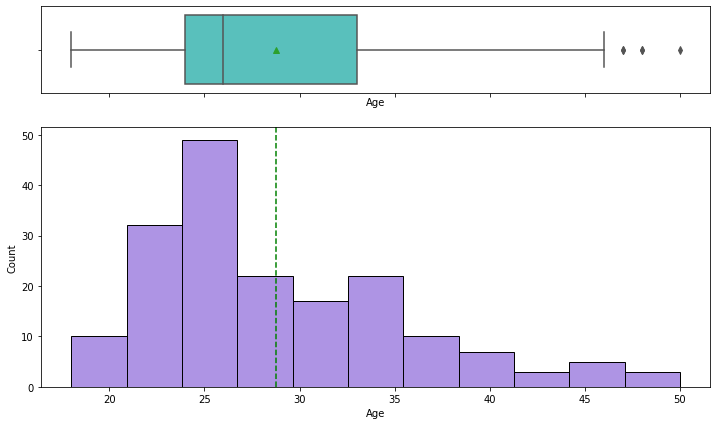

In [10]:
histogram_boxplot(df, 'Age')
# Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650

* The distribution  of Age is right skewed
* There are three (3) outliers in this variable


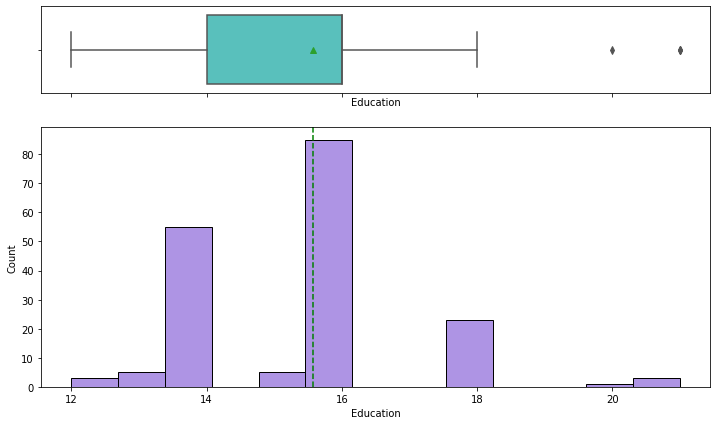

In [11]:
histogram_boxplot(df, 'Education')
# Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650

* There are two (2) outliers in this variable
* The highest number for education is college graduates with 16 years of education

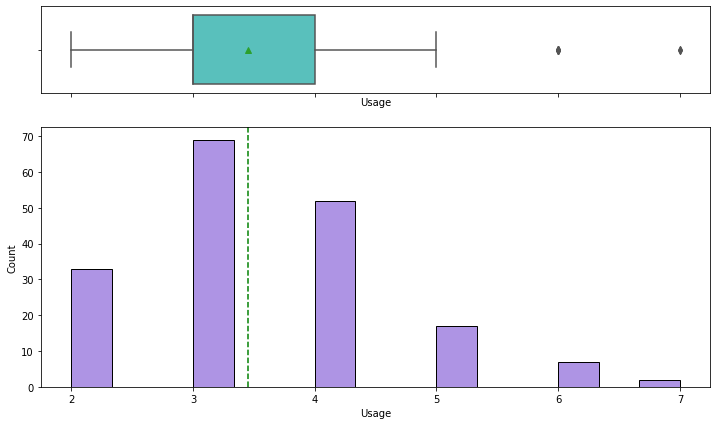

In [12]:
histogram_boxplot(df, 'Usage')
# Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650

* There are two (2) outliers in this variable, customers using the treadmill 6 and 7 times per week
* Customers with the highest usage per week is three (slightly outside the mean of 3.45), followed by 4 times per week

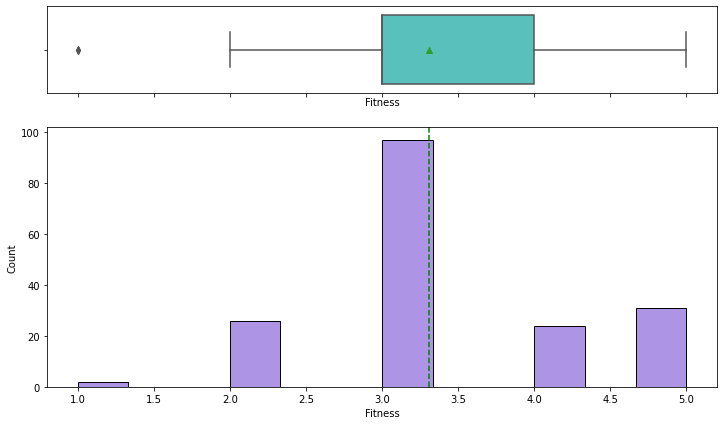

In [13]:
histogram_boxplot(df, 'Fitness')
# Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650

* There is one (1) outlier in this variable that is very unfit.
* Most of the customer are close to the mean for fitness

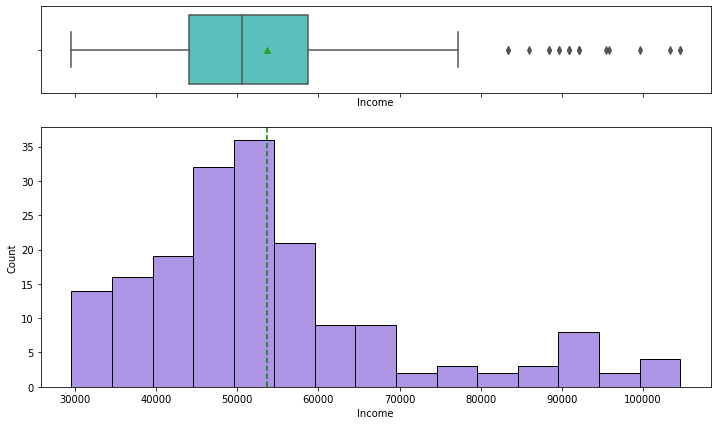

In [14]:
histogram_boxplot(df, 'Income')
# Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650

* The distribution of Income is right skewed
* There are several outliers in this variable outside the 3rd quartile with incomes greater than $58,668

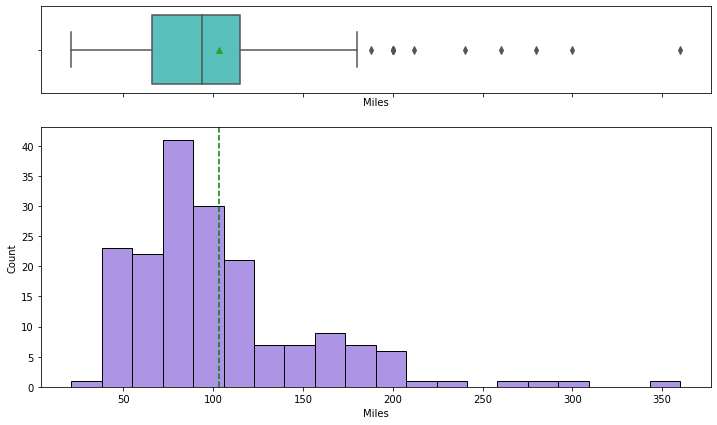

In [15]:
histogram_boxplot(df, 'Miles')
# Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650

* The distribution for Miles is right skewed
* The average customer miles are slightly over one hundred miles per week
* There are eight (8) outliers in this variable, with the highest miles reaching 350 per week. 

##**Univariate Data Analysis**
**Categorical Variables**

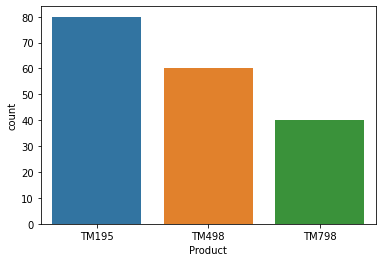

In [16]:
sns.countplot(data=df, x='Product');
# Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650

* Model no.'TM195' has the highest count of all the models

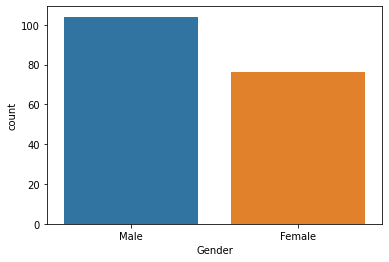

In [17]:
sns.countplot(data=df, x='Gender');
# Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650

* There are more males using the treadmills than females

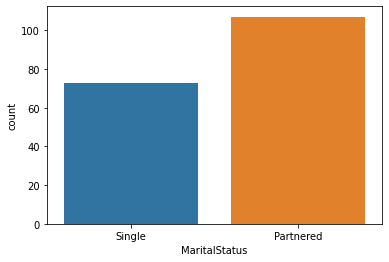

In [18]:
sns.countplot(data=df, x='MaritalStatus');
# Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650

* There are more Partnered users than single users

#**Multivariate Data Analysis**

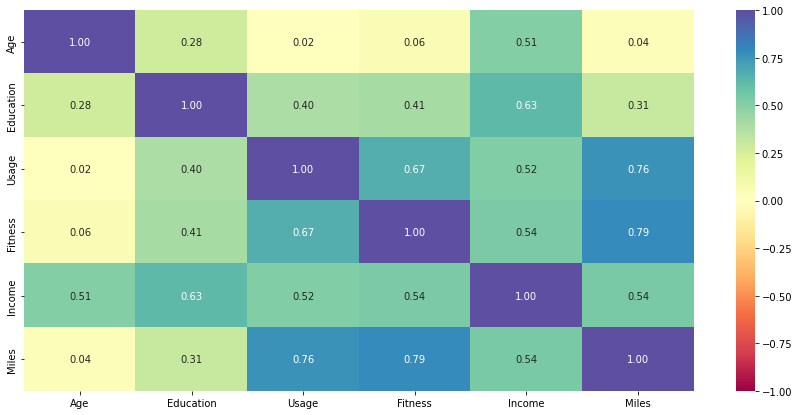

In [20]:
# Correlation by Heatmap
# Check for correlation among numerical variables
num_var = ['Age', 'Education', 'Usage', 'Fitness','Income','Miles']

corr = df[num_var].corr()

# plot the heatmap

plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')
plt.show()

# Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650


* Education plays a moderate correlation with Age
* Usage and Age has little correlation
* Usage has a moderate correlation with Education
* Fitness has little correlation with Age
*  Fitness shows high correlation with Usage
* Income shows median correlation with Age, Education, Usage, and Fitness
* Miles has little correlation with Age
* Miles has a moderate correlation with Education
* Miles shows high correlation with Usage
* Miles shows high correlation with Fitness
* Miles shows median correlation with Income



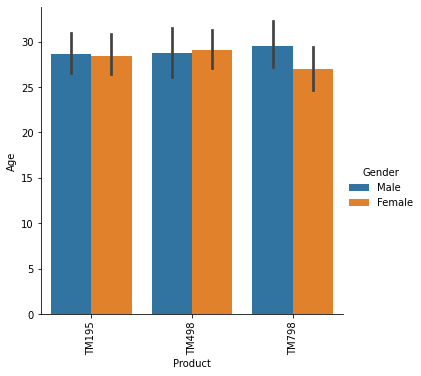

In [21]:
# Checking to see how Product effect Education with Gender
sns.catplot(x='Product', y='Age', data=df, kind='bar', hue='Gender')
plt.xticks(rotation=90)
plt.show()
# Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650

* Gender and Age has little influence on the type of Product used

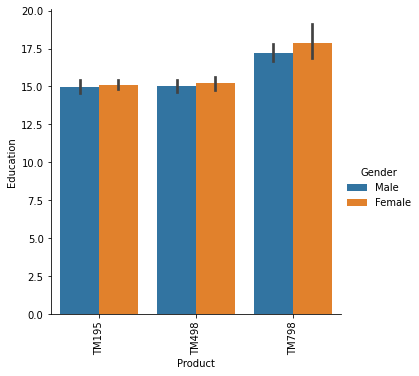

In [22]:
# Checking to see how Product effect Education with Gender
sns.catplot(x='Product', y='Education', data=df, kind='bar', hue='Gender')
plt.xticks(rotation=90)
plt.show()
# Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650

* Higher educated customers slightly prefer model no. TM798

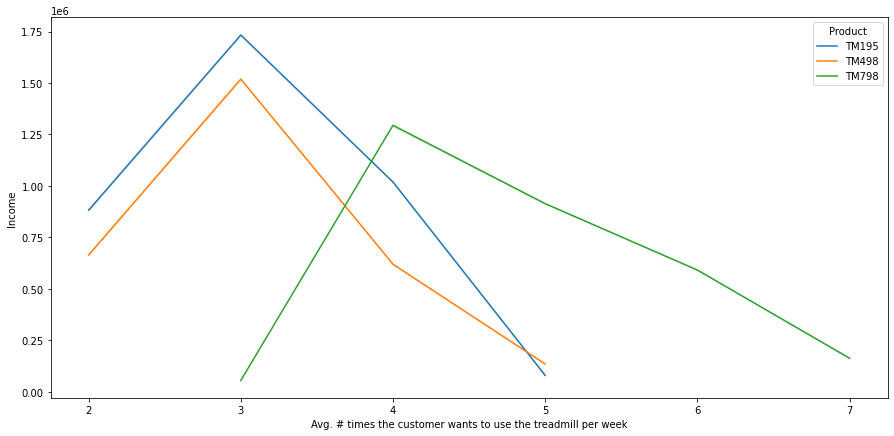

In [23]:
# Checking to see if Product has an effect on Income
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='Usage', y='Income', hue='Product', estimator='sum', ci=False)
plt.ylabel('Income')
plt.xlabel('Avg. # times the customer wants to use the treadmill per week')
plt.show()
# Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650

* Model # TM798 demand is highest for all Incomes up to $125,000

* Model # TM195 sees more demand as Income decreases from $175,000

* Model # TM498 sees more demand as Income decreases from $150,000

* As Income reduces, Usage demand increases per week

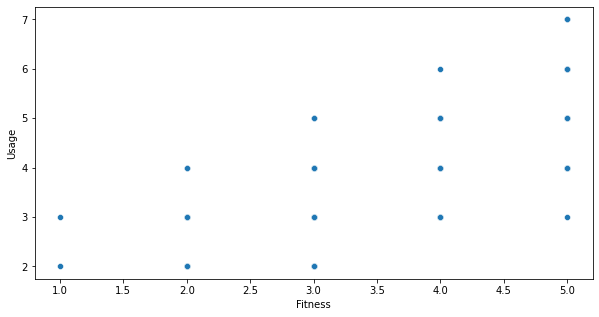

In [32]:
plt.figure(figsize=(10,5)) # Plotting a scatterplot for Usage and Fitness
sns.scatterplot(data=df,x='Fitness', y='Usage')
plt.show()

# Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650

* The higher Fitness rating demands more usage of the treadmills

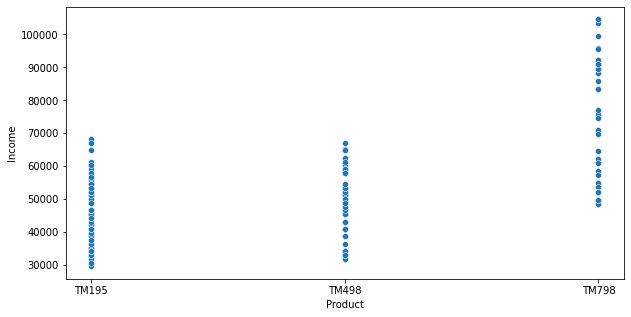

In [38]:
plt.figure(figsize=(10,5)) # Plotting a scatterplot for Income and Product 
sns.scatterplot(data=df,x='Product', y='Income')
plt.show()

# Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650

* Incomes between 30k - 70k prefer TM195 and TM498
* Higher incomes between 50k - 100k+ prefer TM798


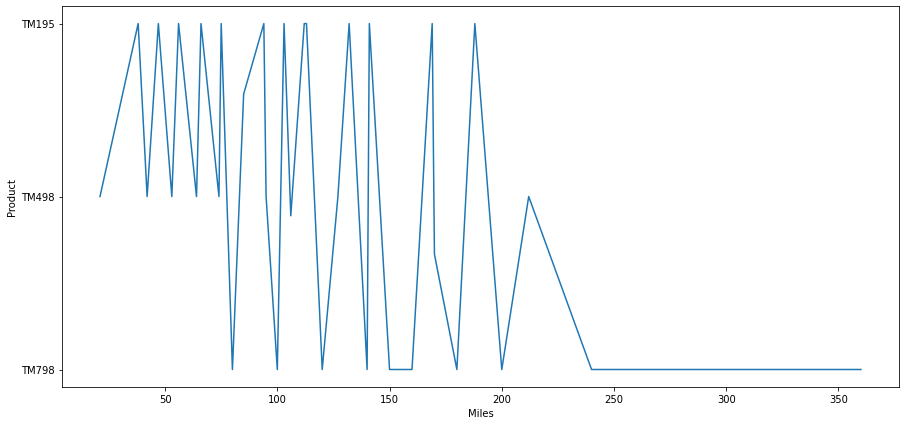

In [34]:
plt.figure(figsize=(15,7)) # Plotting a Line chart for Product and Miles
sns.lineplot(data=df, x='Miles', y= 'Product',ci=None)
plt.show()

# Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650

* After 230 miles all products decrease, after 240 miles all products are flat

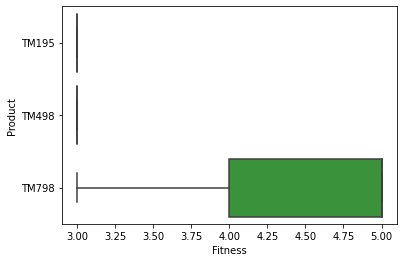

In [36]:
sns.boxplot(data=df,x='Fitness',y='Product', showfliers=False) # Checking Product with the Fitness bins, with outliers turned off
plt.show()

# Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650

* TM798 fitness is the largest
* Customers who perfer TM798 also has the higher income per scatterplot for Product and Income 

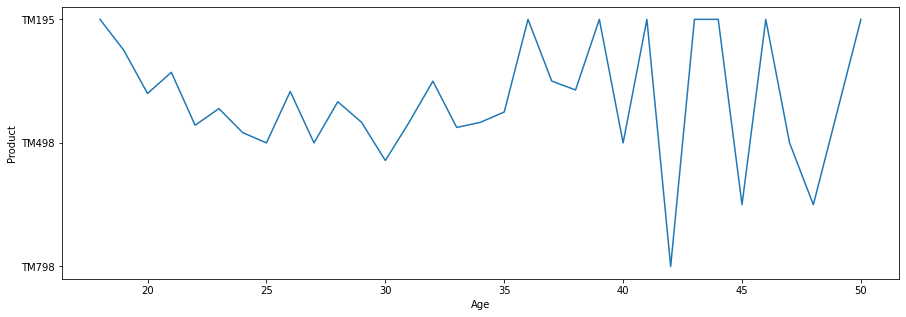

In [39]:
plt.figure(figsize=(15,5)) # Plotting a line chart for Product and Age
sns.lineplot(data=df, x='Age',y='Product',ci=None)
plt.show()

# Source for code: Week_3_Uber_Case_Study.ipynb
# https://olympus.mygreatlearning.com/courses/73879/files/5747077?module_item_id=2747650

* Ages between 18-42 tend to prefer TM195 and TM498
* Ages between 42-50 tend to prefer all products

*Actionable Insights and Recommendations*

**Insights**

I have analyzed a dataset of 180 Customer informations that use the treadmill products. The data spanned over categories such as age, education, usage (demand to use the treadmills), fitness rating, income, and miles run of the treadmill. After analyzing the dataset I identified the differences between the customers of each product

* Age: 75% of customers are between the ages 18-33 years old
* Education: 16 years of education is the average education for the customers in years 
* Usage: treadmill users have a demand to use the treadmills 3.5 per week.
* Fitness: the average customer is reasonably fit with a self rating averaging 3.3
* Income: median income is $50,596.50
* Miles: customers are running an average of 103 miles per week. This calculates to around 30 miles per use of the treadmil. **(Miles per usage = Miles mean / Usage mean) 29.86 = 103/3.45**

* There are three (3) different treadmills within the Product column
  * **Model no.'TM195' has the highest count of all the models**

  * Model no. TM798 demand is highest for all Incomes up to $125,000 
      * Higher educated customers slightly prefer Model no. TM798

  * Model no. TM195 sees more demand as Income decreases from $175,000

  * Model no. TM498 sees more demand as Income decreases from $150,000
  * Incomes between 30k - 70k prefer TM195 and TM498
  * **Ages between 18-42 tend to prefer TM195 and TM498**
  * Higher incomes between 50k - 100k+ prefer TM798 
  * Ages between 42-50 tend to prefer all products

* TM195 has the highest number of the treadmill products with (80)
* Males has the highest number in gender (104)
  * There are more males using the treadmills than females
* Partnered has the highest number in marital status
* Education plays a moderate correlation with Age
* Usage and Age has little correlation
* Usage has a moderate correlation with Education
* Fitness has little correlation with Age
*  **Fitness shows high correlation with Usage**
* Income shows median correlation with Age, Education, Usage, and Fitness
  * **As Income reduces, Usage demand increases per week**
* Miles has little correlation with Age
* Miles has a moderate correlation with Education
* **Miles shows high correlation with Usage**
* **Miles shows high correlation with Fitness**
* Miles shows median correlation with Income
* Gender and Age has little influence on the type of Product used


We have been able to conclude that -

1.	Model no. TM195 is the most popular treadmill 
2.	Customers that prefer TM195 are ages 18-42
3.	Customers that prefer TM195 income range between 30k-70k, as income reduces, usage demand increases
4.	Fitness has a high correlation with usage
5.	Miles shows a high correlation with usage and fitness.
6.	Males have the highest number of usages by gender
7.	Partnered have the highest number in marital status.


**Recommendations to business**

1. Model no. TM195 are most popular with the customers. 
2. The attributes of the customer the company should target are partnered, males between the ages of 18-42, with incomes ranging between 30k-70k. This demographic is high on fitness.  

